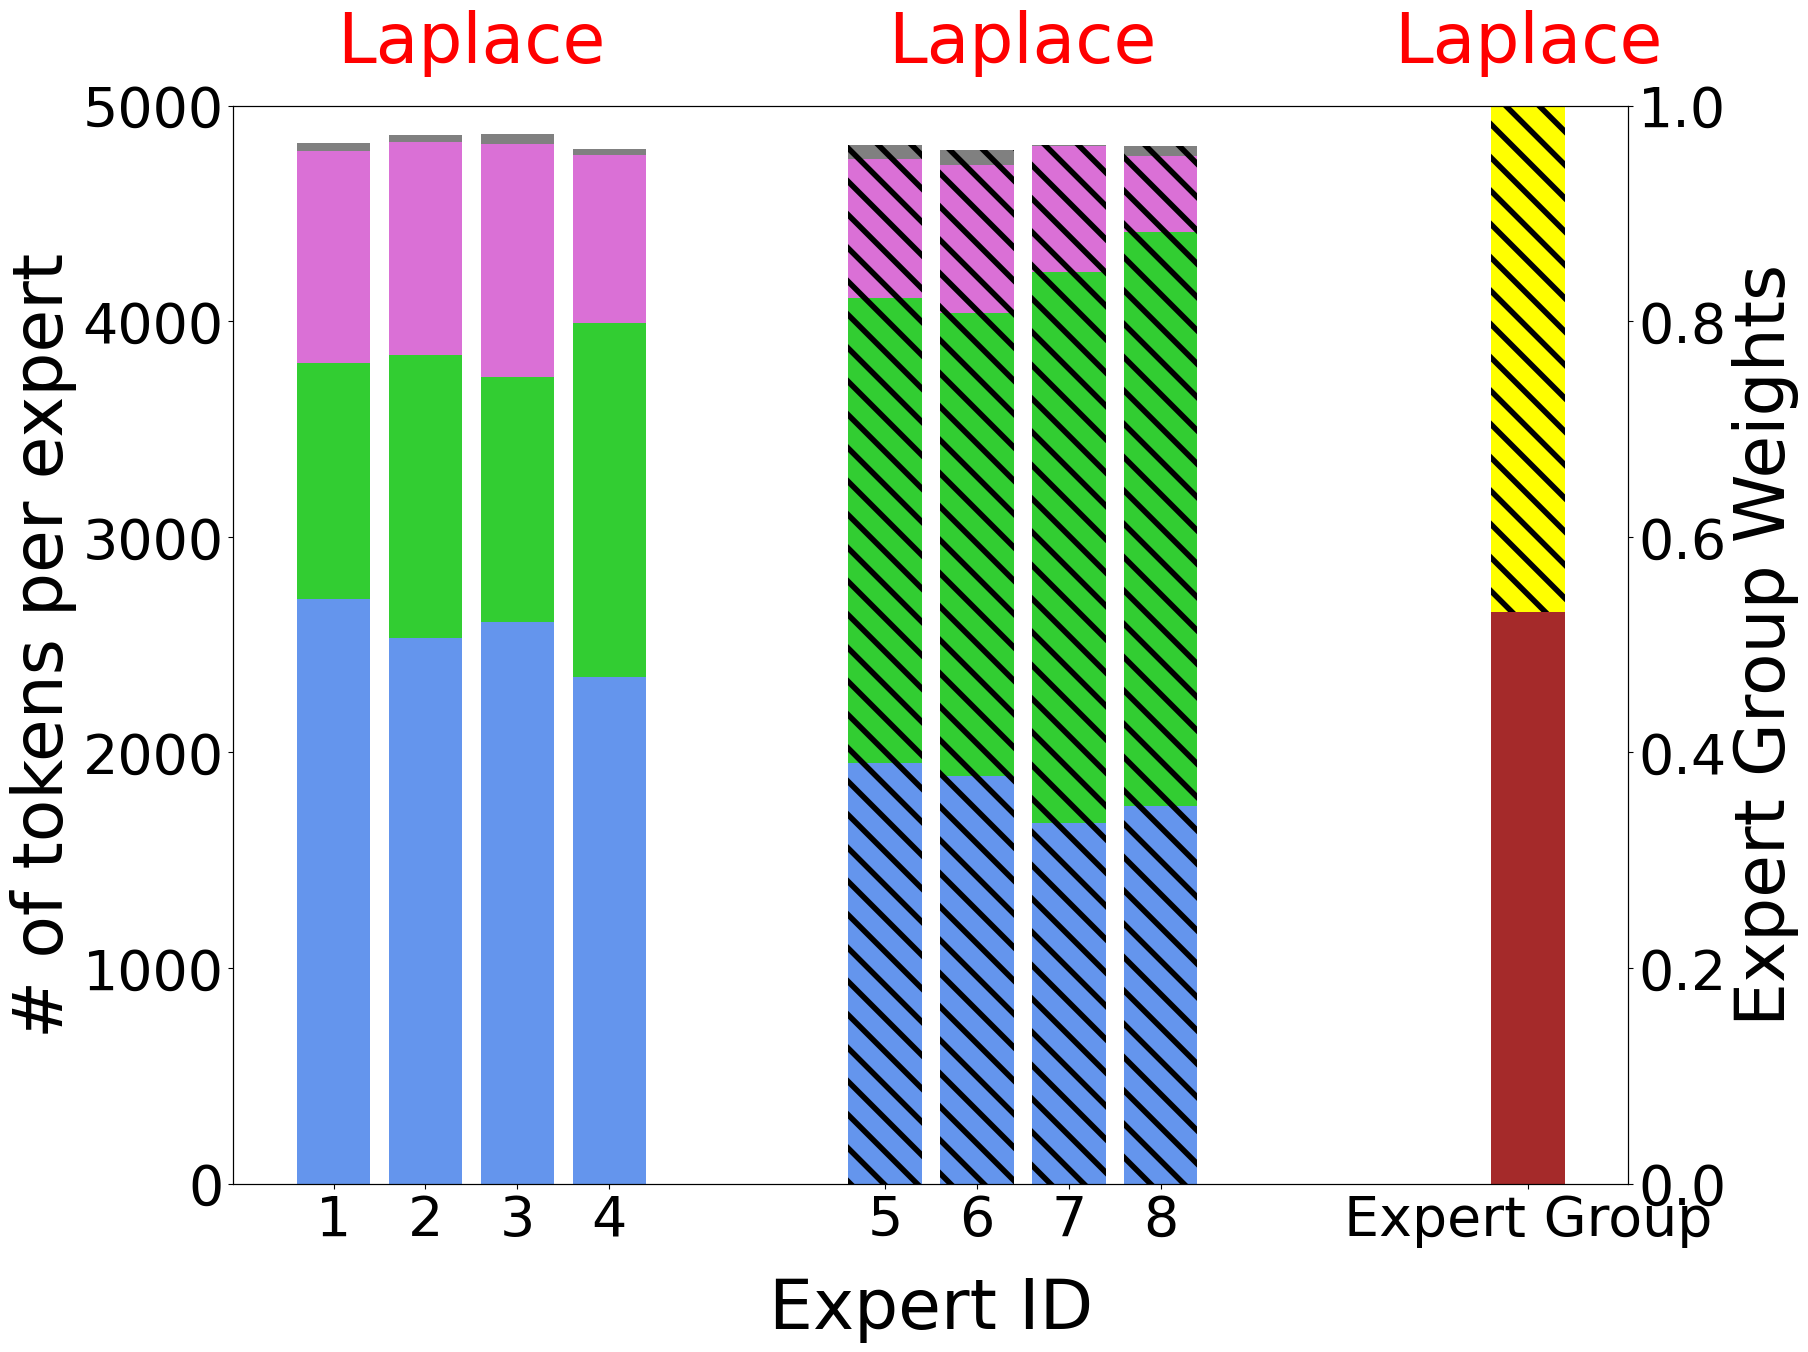

In [3]:
# Required imports after the reset
import matplotlib.pyplot as plt
import numpy as np

# X-axis positions for bars in Group 1, Group 2, and Expert Group
x_axis_group1 = np.array([1, 2, 3, 4])
x_axis_group2 = np.array([7, 8, 9, 10])
x_axis_expert_group = np.array([14])

# Create the plot
fig, ax1 = plt.subplots(figsize=(18, 14))

# Plot Group 1
ax1.bar(x_axis_group1, vital_signs_group1, color='CornflowerBlue', label='Vital Signs')
ax1.bar(x_axis_group1, cxr_group1 - vital_signs_group1, bottom=vital_signs_group1, color='LimeGreen', label='CXR')
ax1.bar(x_axis_group1, clinical_notes_group1 - cxr_group1, bottom=cxr_group1, color='Orchid', label='Clinical Notes')
ax1.bar(x_axis_group1, dropped_token_group1 - clinical_notes_group1, bottom=clinical_notes_group1, color='gray', label='Dropped Token')

# Plot Group 2 with hatch style
plt.rcParams['hatch.linewidth'] = 4.0
ax1.bar(x_axis_group2, vital_signs_group2, color='CornflowerBlue', hatch='\\')
ax1.bar(x_axis_group2, cxr_group2 - vital_signs_group2, bottom=vital_signs_group2, color='LimeGreen', hatch='\\')
ax1.bar(x_axis_group2, clinical_notes_group2 - cxr_group2, bottom=cxr_group2, color='Orchid', hatch='\\')
ax1.bar(x_axis_group2, dropped_token_group2 - clinical_notes_group2, bottom=clinical_notes_group2, color='gray', hatch='\\')

# Plot Expert Group
ax1.bar(x_axis_expert_group, [expert_group1], color='brown', label='Expert Group 1')
ax1.bar(x_axis_expert_group, [expert_group2 - expert_group1], bottom=[expert_group1], color='yellow', hatch='\\', label='Expert Group 2')

# Customize axes
ax1.set_xlabel('Expert ID', fontsize=50, labelpad=20)
ax1.set_ylabel('# of tokens per expert', fontsize=50)
ax1.set_xticks(np.concatenate([x_axis_group1, x_axis_group2, x_axis_expert_group]))
ax1.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 'Expert Group'], fontsize=40)
ax1.tick_params(axis='y', labelsize=40)
ax1.tick_params(axis='x', labelsize=40)
ax1.set_ylim(0, 5000)

# Add legend
# ax1.legend(loc='lower left', fontsize=35)

# Add secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylim(0, 1)
ax2.set_yticks(np.linspace(0, 1, 6))
ax2.tick_params(axis='y', labelsize=40)
ax2.set_ylabel('Expert Group Weights', fontsize=50)

# Annotate "Laplace"
ax1.text(2.5, 5200, 'Laplace', ha='center', fontsize=50, color='red')
ax1.text(8.5, 5200, 'Laplace', ha='center', fontsize=50, color='red')
ax1.text(14, 5200, 'Laplace', ha='center', fontsize=50, color='red')

# plt.show()
plt.savefig('./pheno.pdf')

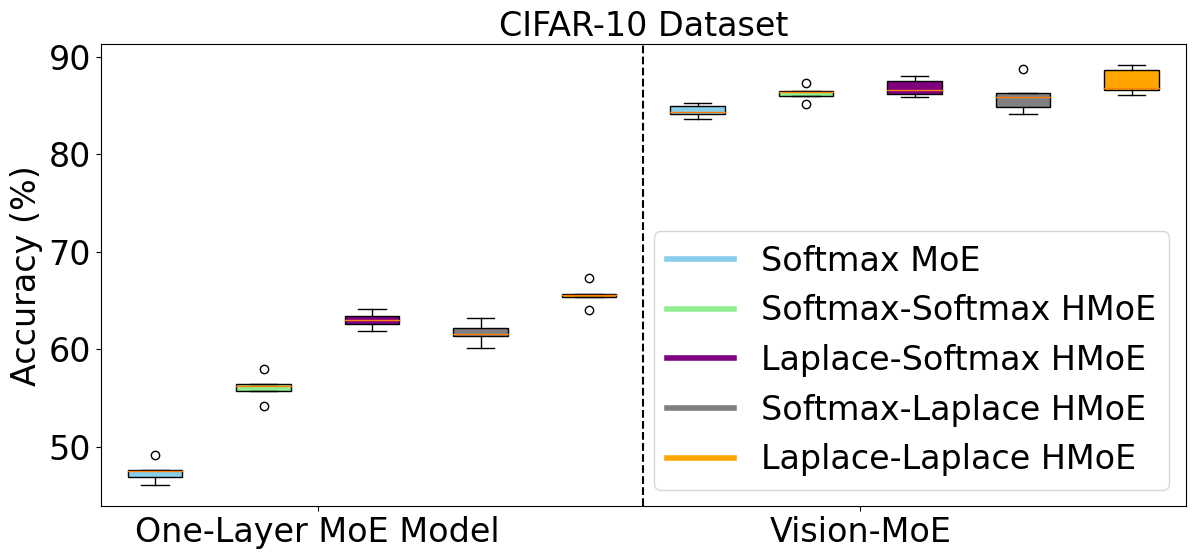

In [1]:
import matplotlib.pyplot as plt

# Data for the two groups
vit_small = {
    'Linear': [77.42, 75.33, 76.87, 76.04, 75.22],
    'GeLU': [79.35, 77.76, 77.05, 80.39, 78.89],
    'Mish': [78.59, 77.37, 78.33, 77.56, 79.54],
    'ReLU': [79.25, 78.69, 79.37, 78.57, 77.67],
    'Sigmoid': [76.86, 75.66, 77.59, 76.37, 75.84],
    'SiLU': [78.38, 77.59, 79.37, 78.04, 77.26],
    'Tanh': [79.12, 78.26, 77.69, 78.57, 79.79],
}

cait = {
    'Linear': [83.31, 82.07, 83.12, 82.79, 81.23],
    'GeLU': [85.05, 84.65, 85.42, 83.89, 83.34],
    'Mish': [81.23, 80.13, 82.54, 81.51, 81.01],
    'ReLU': [84.47, 83.33, 84.56, 84.18, 83.24],
    'Sigmoid': [79.82, 78.39, 81.08, 80.59, 79.28],
    'SiLU': [81.51, 81.39, 83.08, 82.59, 82.28],
    'Tanh': [80.47, 79.39, 82.08, 81.59, 81.48],
}

# Combine the data
data = [
    vit_small['Softmax MoE'], vit_small['Softmax-Softmax HMoE'], 
    vit_small['Laplace-Softmax HMoE'], vit_small['Softmax-Laplace HMoE'], 
    vit_small['Laplace-Laplace HMoE'],
    vit_small['Softmax MoE'], vit_small['Softmax-Softmax HMoE'], 
    vit_small['Laplace-Softmax HMoE'], cait['Softmax-Laplace HMoE'], 
    cait['Laplace-Laplace HMoE']
]

# Boxplot configuration
fig, ax = plt.subplots(figsize=(14, 6))

box = ax.boxplot(
    data, 
    patch_artist=True,
    labels=[
        'Softmax MoE', 'Softmax-Softmax HMoE', 'Laplace-Softmax HMoE', 
        'Softmax-Laplace HMoE', 'Laplace-Laplace HMoE',
        'Softmax MoE', 'Softmax-Softmax HMoE', 'Laplace-Softmax HMoE', 
        'Softmax-Laplace HMoE', 'Laplace-Laplace HMoE'
    ]
)

# Define colors for the box plot
colors = ['skyblue', 'lightgreen', 'purple', 'gray', 'orange'] * 2

# Apply colors to the box plot
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Add a legend
handles = [
    plt.Line2D([0], [0], color='skyblue', lw=4),
    plt.Line2D([0], [0], color='lightgreen', lw=4),
    plt.Line2D([0], [0], color='purple', lw=4),
    plt.Line2D([0], [0], color='gray', lw=4),
    plt.Line2D([0], [0], color='orange', lw=4)
]
ax.legend(handles, ['Softmax MoE', 'Softmax-Softmax HMoE', 'Laplace-Softmax HMoE', 'Softmax-Laplace HMoE', 'Laplace-Laplace HMoE'], loc='lower right', fontsize=24)

# Set labels and title
ax.set_ylabel('Accuracy (%)', fontsize=24)
ax.set_title('CIFAR-10 Dataset', fontsize=24)

# Adjust x-ticks and add a vertical line for separation
ax.set_xticks([2.5, 7.5])
ax.set_xticklabels(['One-Layer MoE Model', 'Vision-MoE'], fontsize=24)
ax.axvline(x=5.5, color='black', linestyle='--')
ax.tick_params(axis='y', labelsize=24)

# Display the plot
plt.show()